In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import normalize

## Reading Data

In [3]:
df = pd.read_csv('train.csv')
print(df.shape)
df.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

* "PassengerId" attribute is an unique identifier column, which won't help us in prediction.
* "Survived" attribute is our target class.
* "Pclass" attribute is an ordinal variable - we need to decide whether to treat it as a categorical variable or numerical.
* "Name" - Not going to help us in prediction.
* "Sex" - Categorical variable, Need to perform OHE.
* "Age" - Numeric variable, need to normalize/standardize.
* "SibSp" - Numeric variable, need to normalize/standardize.
* "Parch" - Numeric variable, need to normalize/standardize.
* "Ticket" - Alphanumeric. Unique Identifier. No use in prediction. 
* "Fare" - Numeric variable, need to normalize/standardize.
* "Cabin" - Categorical variable, Need to perform OHE.
* "Embarked" - Categorical variable, Need to perform OHE.

In [5]:
# ACTION CELL

df = df.drop(["PassengerId", "Name", "Ticket"], axis = 1)

## Checking for Missing values

In [6]:
round((df.isnull().sum()/df.shape[0])*100,2)

Survived     0.00
Pclass       0.00
Sex          0.00
Age         19.87
SibSp        0.00
Parch        0.00
Fare         0.00
Cabin       77.10
Embarked     0.22
dtype: float64

* "Age" attribute has ~20% missing values. We can impute that using mean.
* "Cabin" attribute has ~80% missing values. The best thing would be to drop this.
* "Embarked" attribute has ~0.2% missing values. We can impute that using mode.

In [7]:
# ACTION CELL

df = df.drop(["Cabin"], axis = 1)
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode())

## Numeric Attributes

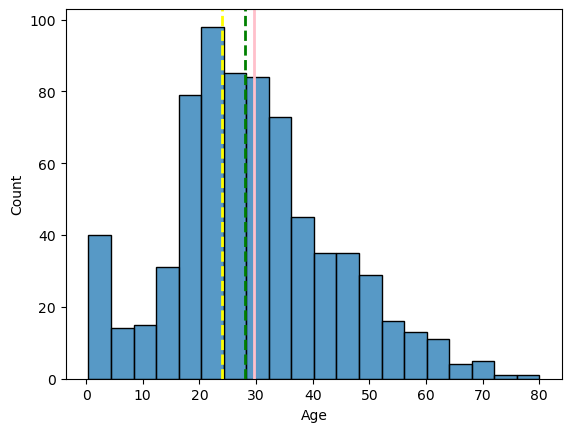

Skewness =  0.38910778230082704


In [8]:
temp = df['Age']
ax = sns.histplot(temp)
ax.axvline(temp.mean(), color='pink', lw=2)
ax.axvline(temp.median(), color='green', ls='--', lw=2)
ax.axvline(temp.mode()[0], color='yellow', ls='--', lw=2)
plt.show()
print("Skewness = ", temp.skew())

* The distribution resembles to a normal distribution. Mean and Median are also close to each other. 
* We can use mean to impute missing values.

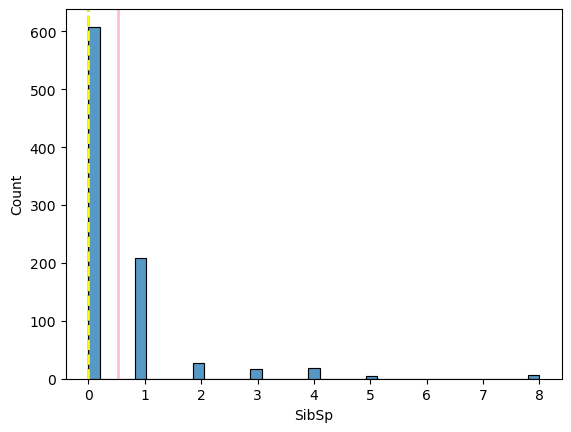

Skewness =  3.6953517271630565


In [9]:
temp = df['SibSp']
ax = sns.histplot(temp)
ax.axvline(temp.mean(), color='pink', lw=2)
ax.axvline(temp.median(), color='green', ls='--', lw=2)
ax.axvline(temp.mode()[0], color='yellow', ls='--', lw=2)
plt.show()
print("Skewness = ", temp.skew())

* The distribution is highly right-skewed. Need to apply transformations.
* Log transformation is not possible as 0 is there.
* Next best thing is cube root transformation. We will try that.

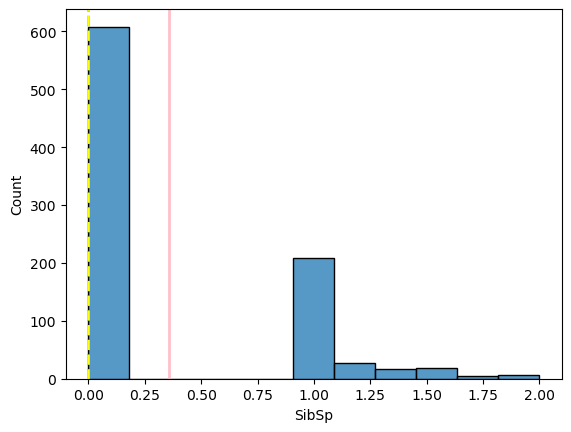

Skewness =  1.033059333447764


In [10]:
temp = np.cbrt(df['SibSp'])
ax = sns.histplot(temp)
ax.axvline(temp.mean(), color='pink', lw=2)
ax.axvline(temp.median(), color='green', ls='--', lw=2)
ax.axvline(temp.mode()[0], color='yellow', ls='--', lw=2)
plt.show()
print("Skewness = ", temp.skew())

* This tranformation has reduced the skewness from 3.69 to 1.03.

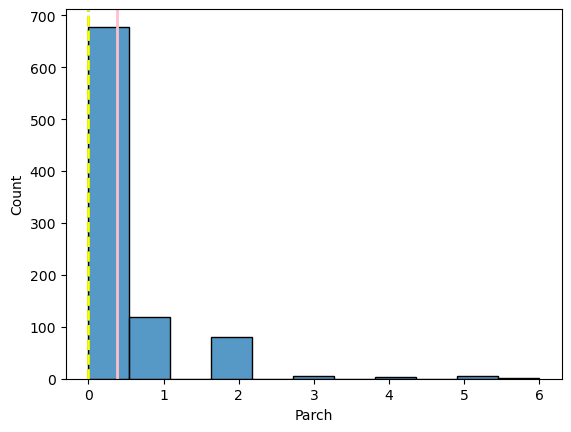

Skewness =  2.7491170471010933


In [11]:
temp = df['Parch']
ax = sns.histplot(temp)
ax.axvline(temp.mean(), color='pink', lw=2)
ax.axvline(temp.median(), color='green', ls='--', lw=2)
ax.axvline(temp.mode()[0], color='yellow', ls='--', lw=2)
plt.show()
print("Skewness = ", temp.skew())

* Applying similar transformations here as well.

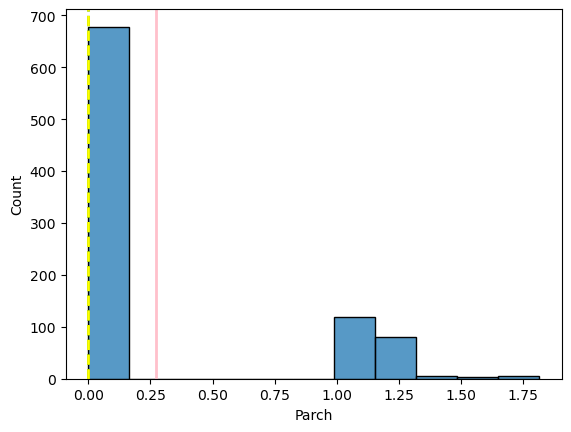

Skewness =  1.3483343755711958


In [12]:
temp = np.cbrt(df['Parch'])
ax = sns.histplot(temp)
ax.axvline(temp.mean(), color='pink', lw=2)
ax.axvline(temp.median(), color='green', ls='--', lw=2)
ax.axvline(temp.mode()[0], color='yellow', ls='--', lw=2)
plt.show()
print("Skewness = ", temp.skew())

* Just like the prev. attribute, this tranformation has reduced the skewness from 2.79 to 1.34.

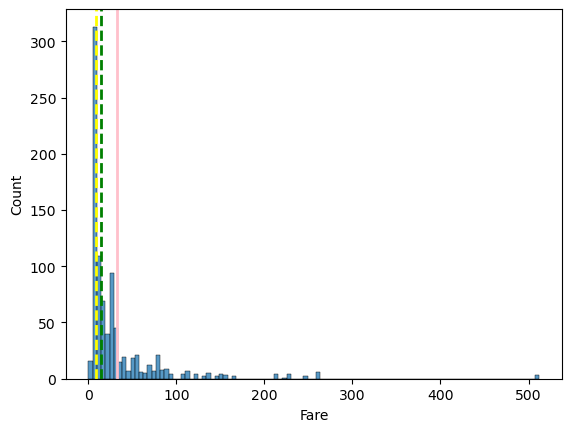

Skewness =  4.787316519674893


In [13]:
temp = df['Fare']
ax = sns.histplot(temp)
ax.axvline(temp.mean(), color='pink', lw=2)
ax.axvline(temp.median(), color='green', ls='--', lw=2)
ax.axvline(temp.mode()[0], color='yellow', ls='--', lw=2)
plt.show()
print("Skewness = ", temp.skew())

* Similar right skewed data. Since, the Fare can't be 0, we can apply log transformation here.

In [14]:
df['Fare'].value_counts()[0]

15

* Uh Oh.. Fare is 0 for 15 records. Lucky people travelling for free..!!
* We will again try cube root transformation and try to reduce the skewness.

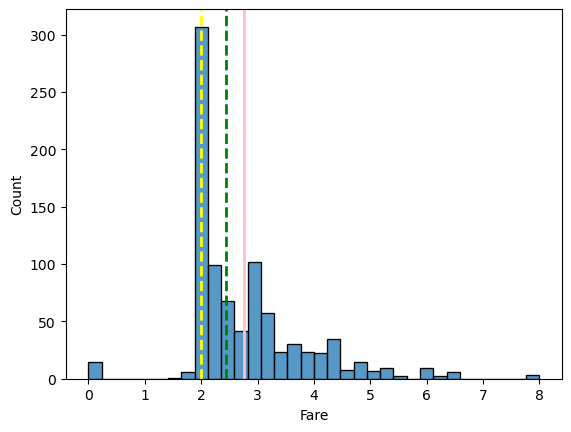

Skewness =  1.2303822111719223


In [15]:
temp = np.cbrt(df['Fare'])
ax = sns.histplot(temp)
ax.axvline(temp.mean(), color='pink', lw=2)
ax.axvline(temp.median(), color='green', ls='--', lw=2)
ax.axvline(temp.mode()[0], color='yellow', ls='--', lw=2)
plt.show()
print("Skewness = ", temp.skew())

* This tranformation has reduced the skewness from 4.78 to 1.23.

In [16]:
# ACTION CELL

df['Age'] = df['Age'].fillna(df['Age'].mean())

df['SibSp'] = np.cbrt(df['SibSp'])
df['Parch'] = np.cbrt(df['Parch'])
df['Fare'] = np.cbrt(df['Fare'])

In [17]:
# ACTION CELL

df['Age'] = normalize(np.array(df['Age']).reshape(1,-1))[0]
df['SibSp'] = normalize(np.array(df['SibSp']).reshape(1,-1))[0]
df['Parch'] = normalize(np.array(df['Parch']).reshape(1,-1))[0]
df['Fare'] = normalize(np.array(df['Fare']).reshape(1,-1))[0]

## Categorical Attributes

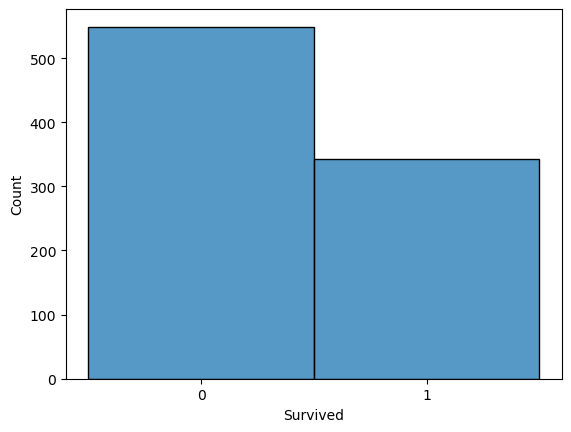

In [18]:
temp = df['Survived'].astype(str)
sns.histplot(temp)
plt.show()

* The target variable 'Survived' is somewhat imabalanced, but we can use it as it is for now.
* Later, we can maybe apply oversampling techniques to get rid of that slight imbalance.

In [19]:
# ACTION CELL

df['Survived'] = df['Survived'].astype(str)

# Taking the Pclass attribute as a categorical variable.
df['Pclass'] = df['Pclass'].astype(str)

In [20]:
# ACTION CELL

X = df.drop(['Survived'], axis = 1)
y = df['Survived']

# Performing OHE for categorical variables
X = pd.get_dummies(X, dtype=float)

In [21]:
X

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.022735,0.05166,0.000000,0.021859,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0.039270,0.05166,0.000000,0.046829,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.026869,0.00000,0.000000,0.022517,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,0.036170,0.05166,0.000000,0.042450,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.036170,0.00000,0.000000,0.022635,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.027903,0.00000,0.000000,0.026556,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
887,0.019635,0.00000,0.000000,0.035093,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
888,0.030692,0.05166,0.074842,0.032327,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
889,0.026869,0.00000,0.000000,0.035093,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


## Model Development

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [23]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

train_acc = model.score(X_train, y_train)
test_acc = model.score(X_test, y_test)

print("Training Accuracy = ", train_acc)
print("Test Accuracy = ", test_acc)

Training Accuracy =  0.7802013422818792
Test Accuracy =  0.7728813559322034


In [24]:
from sklearn.svm import SVC

model = SVC(random_state=42)
model.fit(X_train, y_train)

train_acc = model.score(X_train, y_train)
test_acc = model.score(X_test, y_test)

print("Training Accuracy = ", train_acc)
print("Test Accuracy = ", test_acc)

Training Accuracy =  0.8171140939597316
Test Accuracy =  0.8


In [25]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=20, max_depth=5, random_state=1)
model.fit(X_train, y_train)

train_acc = model.score(X_train, y_train)
test_acc = model.score(X_test, y_test)

print("Training Accuracy = ", train_acc)
print("Test Accuracy = ", test_acc)

Training Accuracy =  0.8557046979865772
Test Accuracy =  0.8203389830508474


## Test Data

In [26]:
df_test_raw = pd.read_csv('test.csv')
df_test_raw

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [27]:
df_test_raw.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [28]:
df_test = df_test_raw.drop(["PassengerId", "Name", "Ticket"], axis = 1)

df_test = df_test.drop(["Cabin"], axis = 1)
df_test['Fare'] = df_test['Fare'].fillna(df_test['Fare'].mean())

df_test['Age'] = df_test['Age'].fillna(df_test['Age'].mean())

df_test['SibSp'] = np.cbrt(df_test['SibSp'])
df_test['Parch'] = np.cbrt(df_test['Parch'])
df_test['Fare'] = np.cbrt(df_test['Fare'])

df_test['Age'] = normalize(np.array(df_test['Age']).reshape(1,-1))[0]
df_test['SibSp'] = normalize(np.array(df_test['SibSp']).reshape(1,-1))[0]
df_test['Parch'] = normalize(np.array(df_test['Parch']).reshape(1,-1))[0]
df_test['Fare'] = normalize(np.array(df_test['Fare']).reshape(1,-1))[0]

# Taking the Pclass attribute as a categorical variable.
df_test['Pclass'] = df_test['Pclass'].astype(str)

# Performing OHE for categorical variables
df_test = pd.get_dummies(df_test, dtype=float)

In [29]:
df_test

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.051450,0.000000,0.000000,0.031859,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.070092,0.078677,0.000000,0.030692,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,0.092462,0.000000,0.000000,0.034203,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.040266,0.000000,0.000000,0.032951,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0.032809,0.078677,0.087523,0.037023,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,0.045146,0.000000,0.000000,0.032155,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
414,0.058161,0.000000,0.000000,0.076618,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
415,0.057416,0.000000,0.000000,0.031053,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
416,0.045146,0.000000,0.000000,0.032155,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [30]:
result = pd.DataFrame(columns = ['PassengerId', 'Survived'])
result['PassengerId'] = df_test_raw['PassengerId']
result['Survived'] = model.predict(df_test).astype(int)

result

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [31]:
result.to_csv('submission.csv', index=False)